In [1]:
import cv2 #import OpenCV
from matplotlib import pyplot as plt #import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [105]:
im = cv2.imread('ten.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

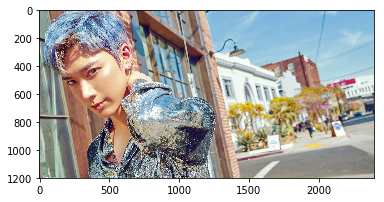

In [106]:
plt.imshow(im)

In [107]:
def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)

In [108]:
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)

In [109]:
def display_image_actual_size_double(im_data1,im_data2):
    # assuming that the two input images have the same dimension and shape
    # then, we calculate figsize from one of the two images
    figuresize = get_figsize(im_data1)
    # Create a figure of the right size that can accommodate two images side-by-side
    fig = plt.figure(figsize=(figuresize[0],figuresize[1]*2+.1))
    ax1 = fig.add_axes([0,0,1,1])
    ax1.imshow(im_data1, cmap='gray')
    ax1.axis('off')
    ax2 = fig.add_axes([1.1,0,1,1])
    ax2.imshow(im_data2, cmap='gray')
    ax2.axis('off')
    return(fig)

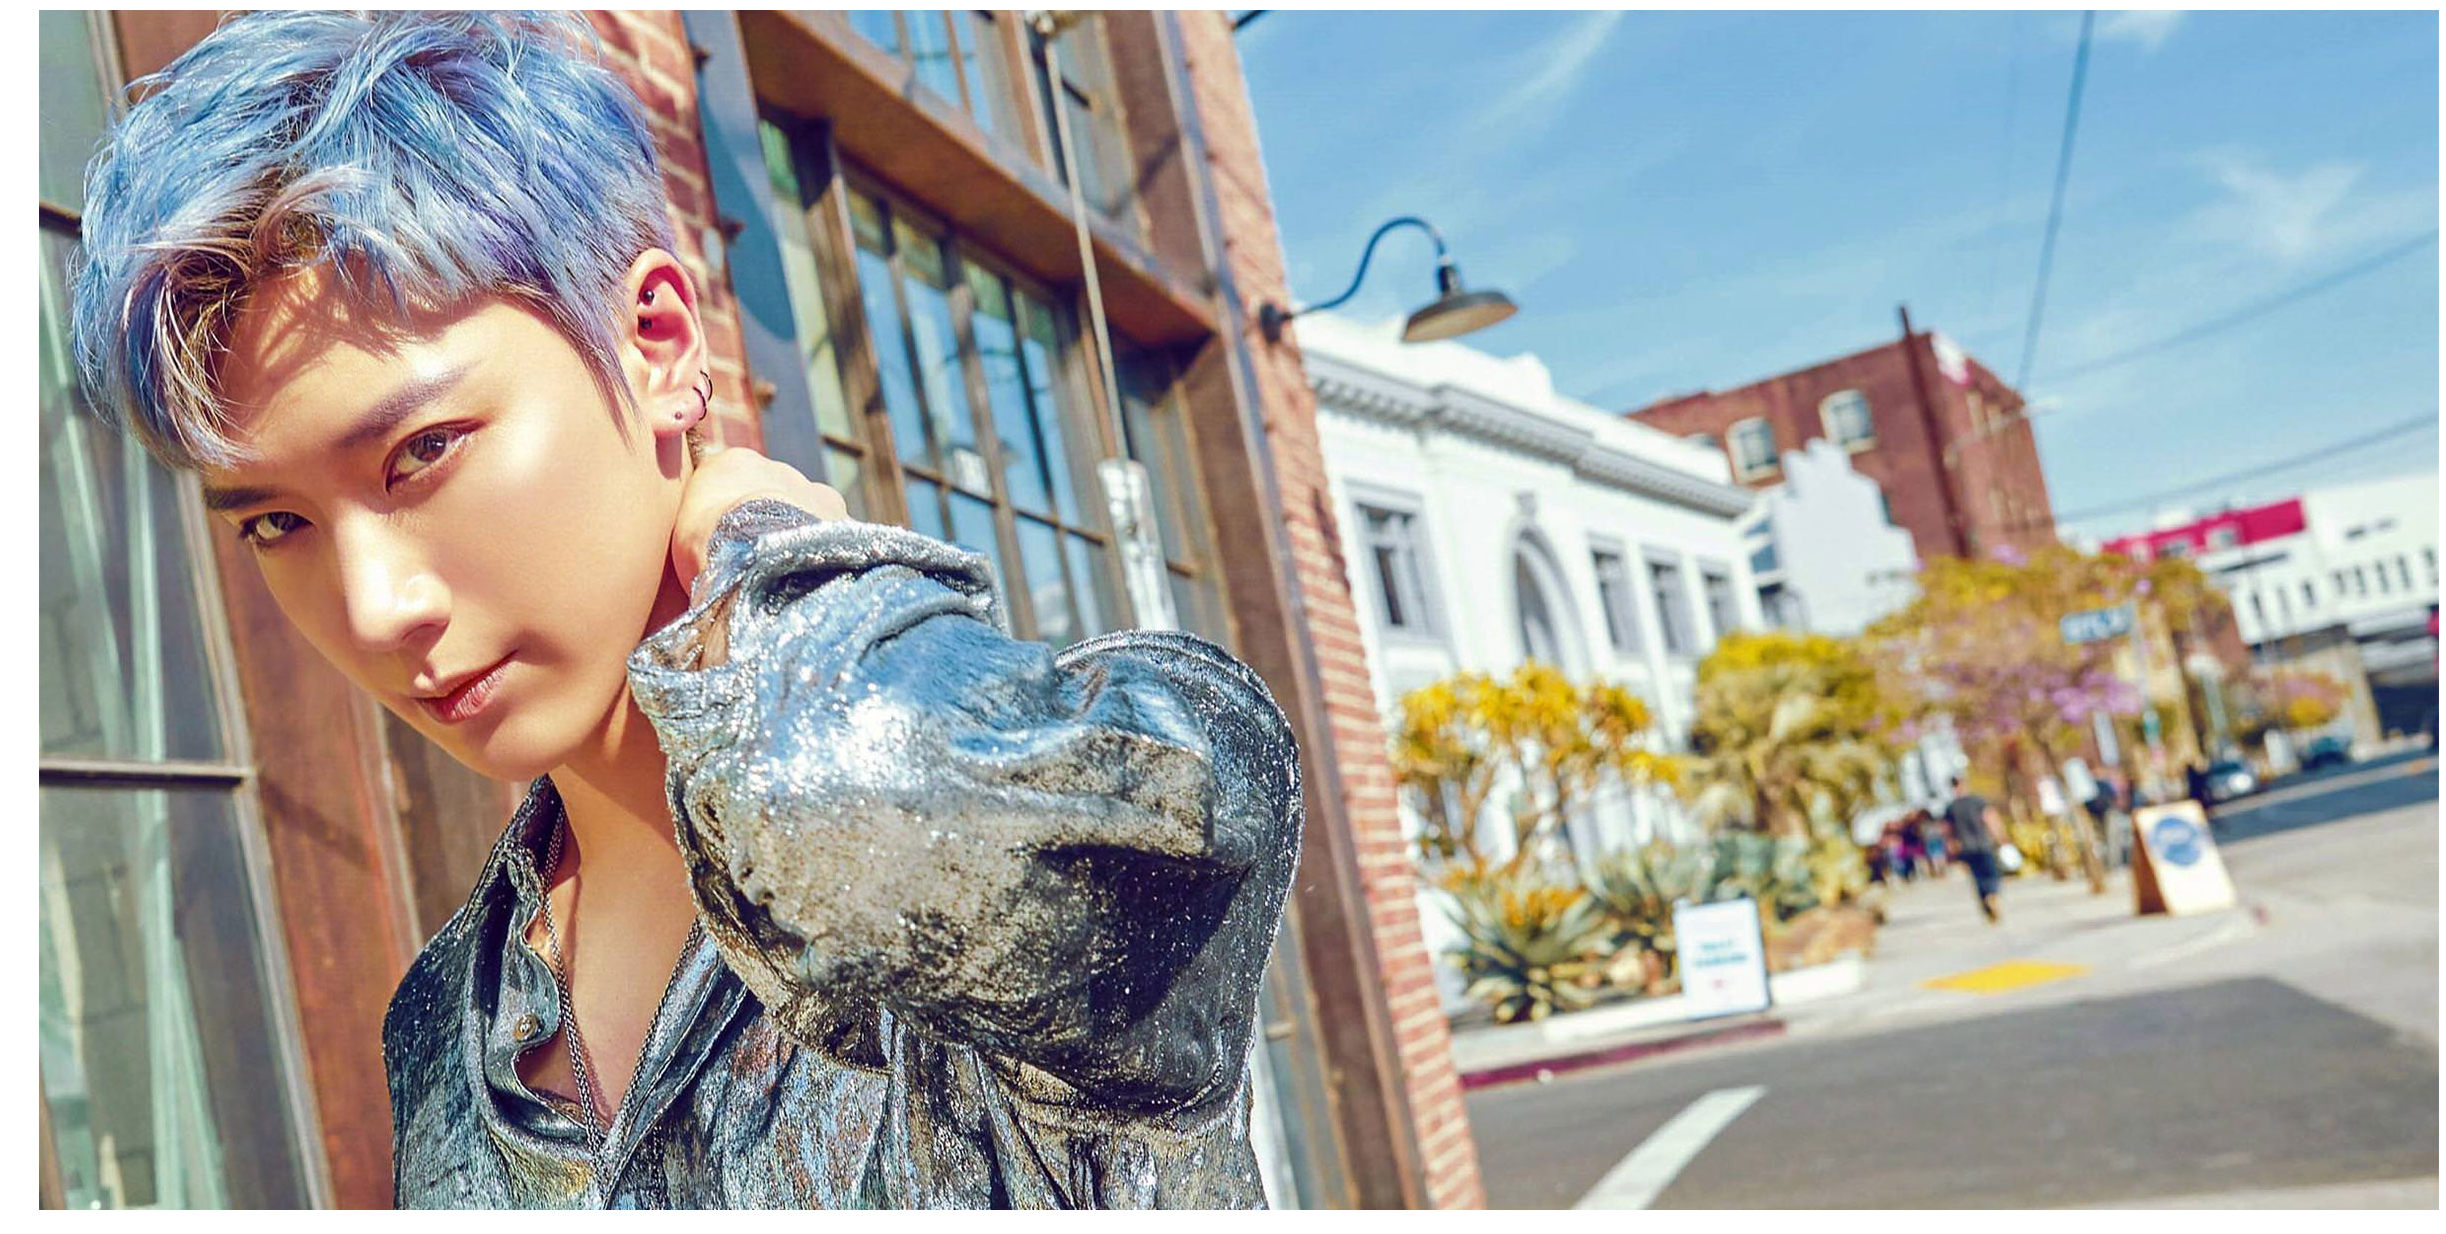

In [110]:
fig = display_image_actual_size_single(im)

(400, 400)


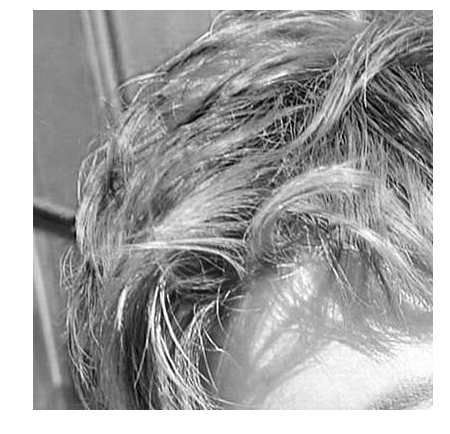

In [111]:
# Blue in gray
roi1 = im[0:400, 0:400]
Blueingray = cv2.cvtColor(roi1, cv2.COLOR_BGR2GRAY)
Blueingray = roi1[:,:,0]
roi1=Blueingray
print(roi1.shape)
fig = display_image_actual_size_single(roi1)

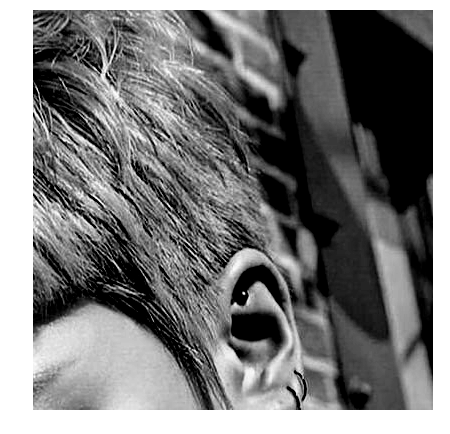

In [113]:
# darker = cv2.subtract(im,weight) 

roi2 = im[0:400, 400:800]
roi2 = cv2.cvtColor(roi2, cv2.COLOR_BGR2GRAY)
weight = 100

darker = cv2.subtract(roi2,weight)
fig = display_image_actual_size_single(darker)

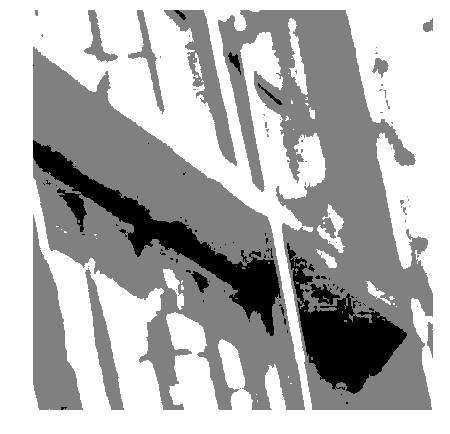

In [115]:
roi3 = im[0:400, 800:1200]
roi3 = cv2.cvtColor(roi3, cv2.COLOR_BGR2GRAY)

# Lower Contrast
weight = 100
lower = cv2.divide(roi3,weight)
fig = display_image_actual_size_single(lower)

In [118]:
im[0:400,0:400] = roi1

im[0:400,400:800] = darker

im[0:400,800:1200] = lower

fig = display_image_actual_size_single(im)

ValueError: could not broadcast input array from shape (400,400) into shape (400,400,3)

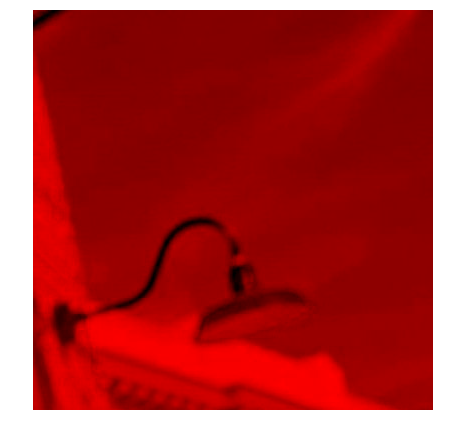

In [65]:
# Red
roi4 = im[0:400, 1200:1600]
onecolorR = roi4
onecolorR[:,:,1] = 0
onecolorR[:,:,2] = 0
fig = display_image_actual_size_single(roi4)

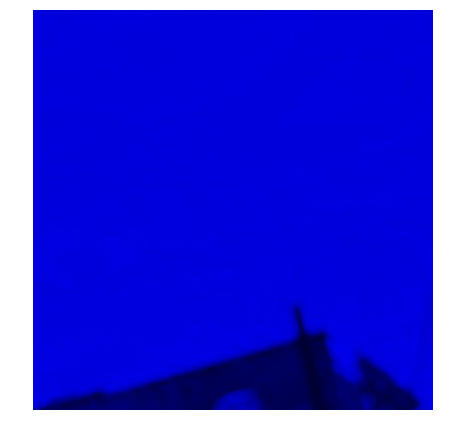

In [66]:
# Blue
roi5 = im[0:400, 1600:2000]
onecolorB = roi5
onecolorB[:,:,0] = 0
onecolorB[:,:,1] = 0
fig = display_image_actual_size_single(roi5)

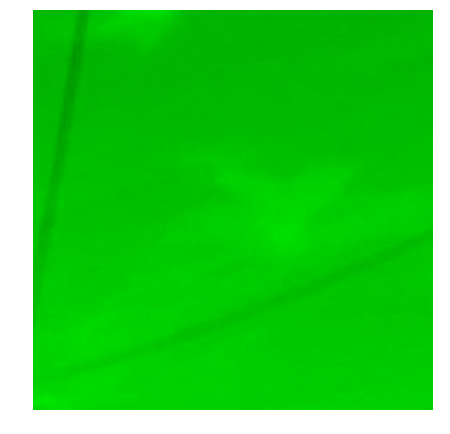

In [67]:
# Green
roi6 = im[0:400, 2000:2400]
onecolorG = roi6
onecolorG[:,:,0] = 0
onecolorG[:,:,2] = 0
fig = display_image_actual_size_single(roi6)

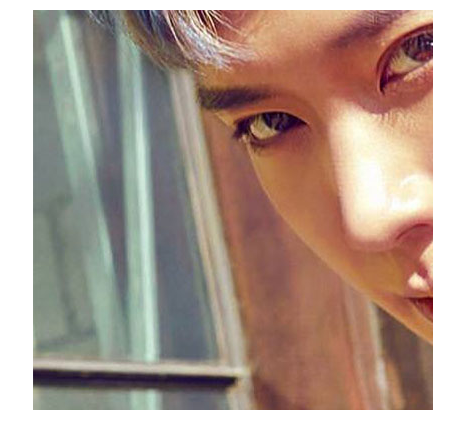

In [71]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi7 = im[400:800, 0:400]
fig = display_image_actual_size_single(roi7)

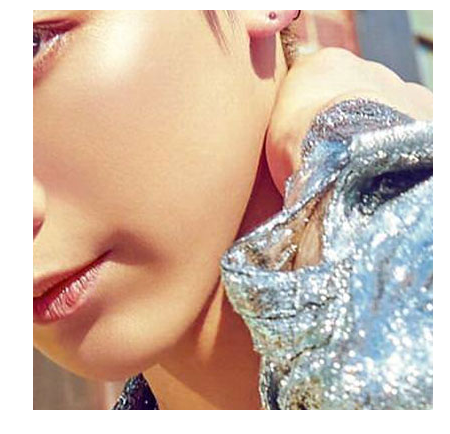

In [73]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi8 = im[400:800, 400:800]
fig = display_image_actual_size_single(roi8)

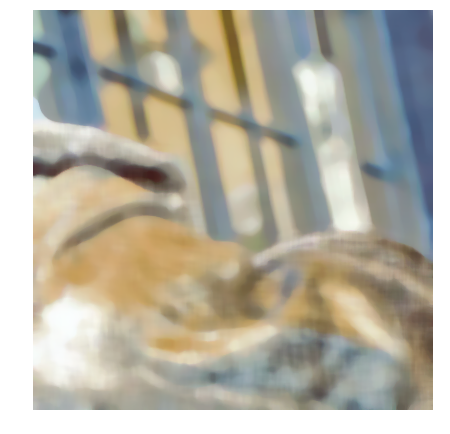

In [18]:
# Median Filter
im9 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi9 = im9[400:800, 800:1200]
medianFiltered = cv2.medianBlur(roi9,15)  
roi9 = medianFiltered
fig = display_image_actual_size_single(roi9)

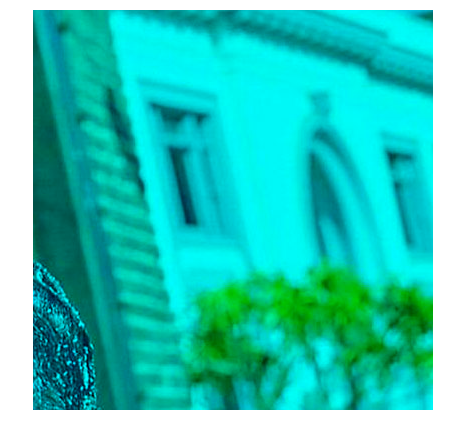

In [19]:
# Blue-Green
roi10 = im[400:800, 1200:1600]
onecolorBG = roi10
onecolorBG[:,:,0] = 0
fig = display_image_actual_size_single(roi10)

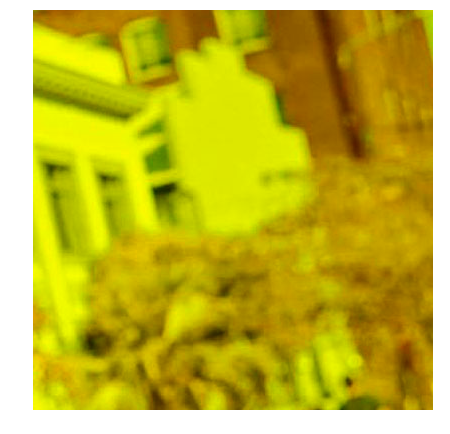

In [20]:
#Green-Red
roi11 = im[400:800, 1600:2000]
onecolorGR = roi11
onecolorGR[:,:,2] = 0
fig = display_image_actual_size_single(roi11)

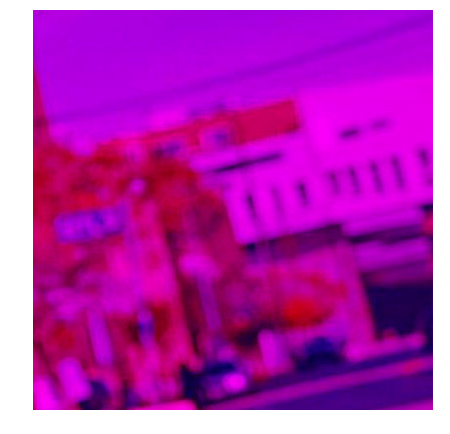

In [21]:
#Red-Blue
roi12 = im[400:800, 2000:2400]
onecolorRB = roi12
onecolorRB[:,:,1] = 0
fig = display_image_actual_size_single(roi12)

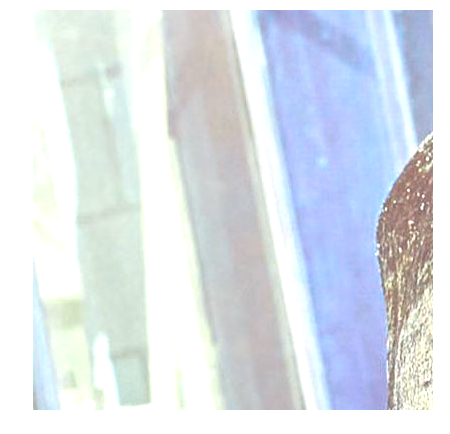

In [22]:
# brighter
im13 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi13 = im13[800:1200, 0:400]
weight = 100
brighter = np.ones(roi13.shape,dtype='uint8')
for i in np.arange(0,3):
    brighter[:,:,i] = cv2.add(roi13[:,:,i], weight)
roi13=brighter
fig = display_image_actual_size_single(roi13)

# im = cv2.imread('ten.jpg')
# im13 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# roi13 = im13[800:1200, 0:400]
# weight = 100
# brighter = cv2.add(roi13,weight)
# roi13=brighter
# fig = display_image_actual_size_single(roi13)

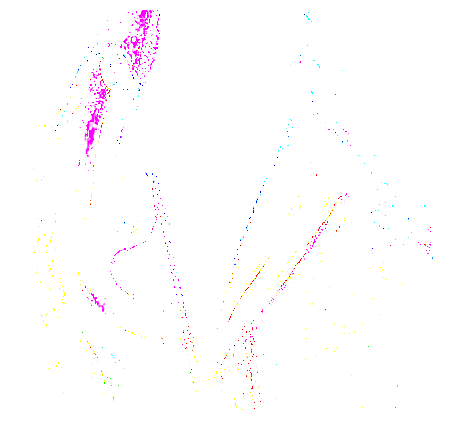

In [23]:
# im = cv2.imread('ten.jpg')
# im14 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# roi14 = im14[800:1200, 400:800]
# weight = 100
# lower = np.ones(roi14.shape,dtype='uint8')
# for i in np.arange(0,3):
#     lower[:,:,i] = cv2.divide(weight, roi14[:,:,i])
# roi14 = lower

# # # Lower Contrast
# # lower = cv2.divide(roi14,weight)
# # roi14=lower
# fig = display_image_actual_size_single(roi14)

#Higher Contrast
im14 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi14 = im14[800:1200, 400:800]
weight = 100
hight = np.ones(roi14.shape,dtype='uint8')
for i in np.arange(0,3):
    hight[:,:,i] = cv2.multiply(weight, roi14[:,:,i])
roi14=hight
fig = display_image_actual_size_single(roi14)

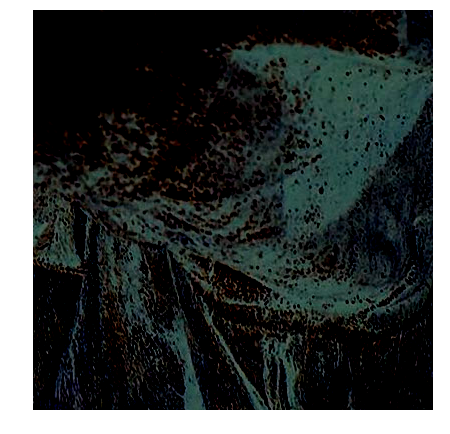

In [24]:
# negative
im15 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi15 = im15[800:1200, 800:1200]
weight = 100
negative = np.ones(roi15.shape,dtype='uint8')
for i in np.arange(0,3):
    negative[:,:,i] = cv2.subtract(weight, roi15[:,:,i])
roi15=negative
fig = display_image_actual_size_single(roi15)

In [25]:
def saltpepper_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

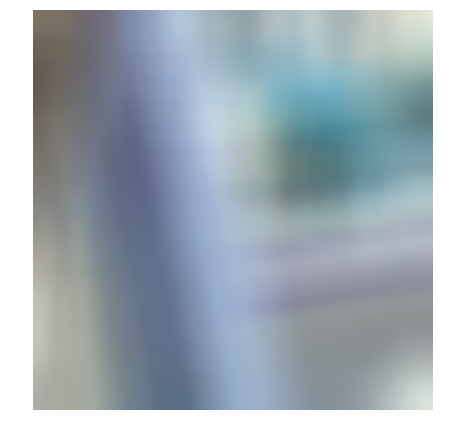

In [26]:
# Box Average
im16 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi16 = im16[800:1200, 1200:1600]
blurBox = cv2.boxFilter(roi16, -1, (75,75))
roi16=blurBox
fig = display_image_actual_size_single(roi16)

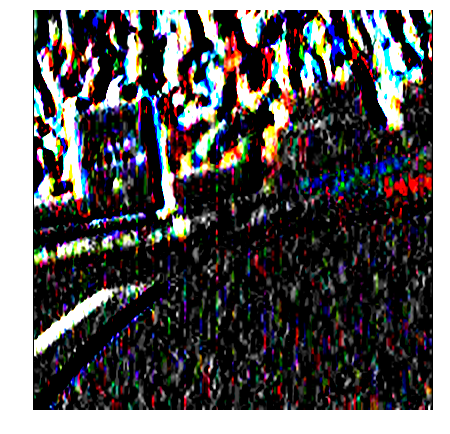

In [27]:
# Vertical Edges
im17 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi17 = im7[800:1200, 1600:2000]
sobeledgeV = cv2.Sobel(roi17, -1, 1, 0, ksize=5)
roi17 = sobeledgeV
fig = display_image_actual_size_single(roi17)

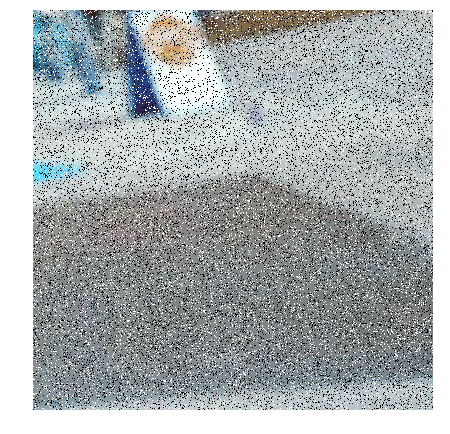

In [28]:
# Salt & Pepper Noise
im18 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
roi18 = im18[800:1200, 2000:2400]
imSP = saltpepper_noise(roi18,0.1)
roi18=imSP
fig = display_image_actual_size_single(roi18)